Quanvolutional Filter Quantum Circuit:
           ┌───┐   ┌─────────┐      ░ ┌─┐   
   q_0: ───┤ H ├───┤ Ry(π/4) ├──■───░─┤M├───
        ┌──┴───┴──┐└─────────┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ Ry(π/3) ├───────────┤ X ├─░──╫─┤M├
        └─────────┘           └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════╩══╩═
                                       0  1 
Quanvolutional Filter Output: {'00': 95, '10': 35, '11': 638, '01': 232}


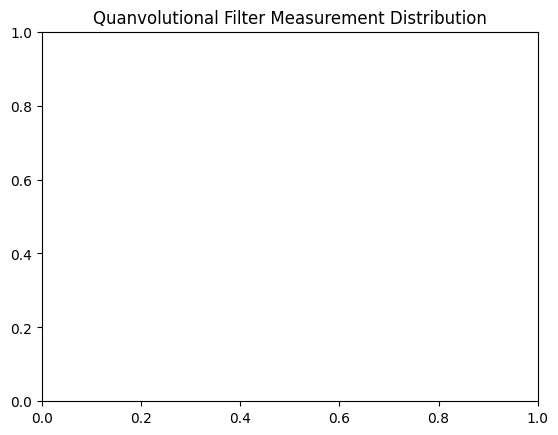

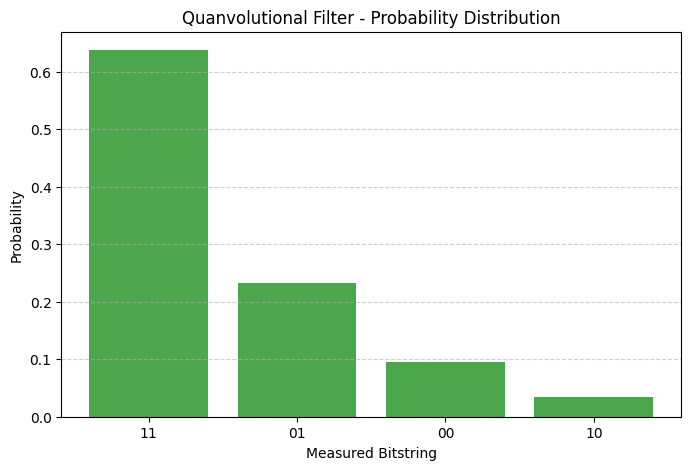

In [1]:
#-------------------------------------------------------------------------
# Quanvolution NN 
# Chapter 9 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import plot_histogram
#-------------------------------------------------------------------------
 
def quantum_filter(theta):
    """ Quantum filter for image patches """
    qc = QuantumCircuit(2)
    
    # Apply Hadamard gate for superposition
    qc.h(0)  
    
    # Rotation gates with learnable parameters
    qc.ry(theta[0], 0)  
    qc.ry(theta[1], 1)

    # Introduce entanglement
    qc.cx(0, 1)  
    
    # Measure all qubits
    qc.measure_all()
    
    return qc
#-------------------------------------------------------------------------

# Example theta values for the quantum convolutional filter
theta = [np.pi / 4., np.pi / 3.]
qc    = quantum_filter(theta)

# Display the quantum circuit
print("Quanvolutional Filter Quantum Circuit:")
print(qc)
qc.draw('mpl')

# Simulate the quantum filter
backend     = Aer.get_backend('aer_simulator')
compiled_qc = transpile(qc, backend)
result = execute(compiled_qc, backend, shots=1000).result()
counts = result.get_counts()

# Convert measurement results into a probability distribution
bitstrings    = list(counts.keys())
probabilities = np.array(list(counts.values())) / 1000.0

# Sort results for visualization
sorted_indices       = np.argsort(probabilities)[::-1]
sorted_bitstrings    = np.array(bitstrings)[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]

# Print and visualize measurement results
print("Quanvolutional Filter Output:", counts)
plot_histogram(counts)
plt.title("Quanvolutional Filter Measurement Distribution")
plt.show()

# Plot the probability distribution of the quantum filter
plt.figure(figsize=(8, 5))
plt.bar(sorted_bitstrings, sorted_probabilities, color='green', alpha=0.7)
plt.xlabel("Measured Bitstring")
plt.ylabel("Probability")
plt.title("Quanvolutional Filter - Probability Distribution")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()
